<a href="https://colab.research.google.com/github/elvirasru/exploratoy/blob/main/madrid_unemployment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exploratory Data Analysis

In [1]:
import pandas as pd
import numpy as np
import requests as rq
import io

## 1. Read Data

In [28]:
response2020 = rq.get('https://datos.madrid.es/egob/catalogo/300296-6-empleo-inscripciones.csv')
response2019 = rq.get('https://datos.madrid.es/egob/catalogo/300296-4-empleo-inscripciones.csv')
response2018 = rq.get('https://datos.madrid.es/egob/catalogo/300296-2-empleo-inscripciones.csv')

file_object1 = io.StringIO(response2020.content.decode('latin-1'))
file_object2 = io.StringIO(response2019.content.decode('latin-1'))
file_object3 = io.StringIO(response2018.content.decode('latin-1'))

In [29]:
dataset2020 = pd.read_csv(file_object1, sep = ';')
dataset2019 = pd.read_csv(file_object2, sep = ';')
dataset2018 = pd.read_csv(file_object3, sep = ';')

In [30]:
dataset2020.head(2)

,Fecha de Inscripción,Género,Distrito,Tramos de Edad,Nacionalidad,Código Objetivo Profesional 1,Objetivo Profesional 1,Código Objetivo Profesional 2,Objetivo Profesional 2,Código Objetivo Profesional 3,Objetivo Profesional 3
0,ene-20,Hombre,Tetuán,Entre 26 y 35 años,Española,7231.0,Pintores y empapeladores,9310.0,Ayudantes de cocina,5120.0,Camareros asalariados
1,ene-20,Mujer,Puente De Vallecas,Entre 26 y 35 años,Española,2823.0,Psicólogos,2311.0,Profesores de educación especial,2240.0,Profesores de enseñanza primaria


In [5]:
dataset2019.head(2)

,Fecha de Inscripción,Género,Distrito,Tramos de Edad,Nacionalidad,Código Objetivo Profesional 1,Objetivo Profesional 1,Código Objetivo Profesional 2,Objetivo Profesional 2,Código Objetivo Profesional 3,Objetivo Profesional 3
0,ene-19,Mujer,Otro Municipio,Entre 36 y 45 años,Española,3613.0,Asistentes de dirección y administrativos,4500.0,Empleados administrativos con tareas de atenci...,2329.0,Profesores y profesionales de la enseñanza no ...
1,ene-19,Mujer,Usera,Entre 36 y 45 años,Española,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
dataset2018.head(2)

,Fecha de Inscripción,Género,Distrito,Tramos de Edad,Nacionalidad,Código Objetivo Profesional 1,Objetivo Profesional 1,Código Objetivo Profesional 2,Objetivo Profesional 2,Código Objetivo Profesional 3,Objetivo Profesional 3
0,enero-18,Mujer,Carabanchel,Entre 26 y 35 años,Española,5611.0,Auxiliares de enfermería hospitalaria,5611.0,Auxiliares de enfermería hospitalaria,5710.0,Trabajadores de los cuidados personales a domi...
1,enero-18,Mujer,Tetuán,Entre 36 y 45 años,Española,5120.0,Camareros asalariados,5220.0,Vendedores en tiendas y almacenes,9210.0,"Personal de limpieza de oficinas, hoteles y ot..."


In [53]:
dataset = pd.concat([dataset2018, dataset2019, dataset2020], axis= 0)

## 2. Clean Data

In [54]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 46792 entries, 0 to 15138
Data columns (total 11 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Fecha de Inscripción           46792 non-null  object 
 1   Género                         46792 non-null  object 
 2   Distrito                       46792 non-null  object 
 3   Tramos de Edad                 46792 non-null  object 
 4   Nacionalidad                   46792 non-null  object 
 5   Código Objetivo Profesional 1  44581 non-null  float64
 6   Objetivo Profesional 1         44581 non-null  object 
 7   Código Objetivo Profesional 2  37423 non-null  float64
 8   Objetivo Profesional 2         37423 non-null  object 
 9   Código Objetivo Profesional 3  30873 non-null  float64
 10  Objetivo Profesional 3         30873 non-null  object 
dtypes: float64(3), object(8)
memory usage: 4.3+ MB


Change the type of columns "Código Objetivo Profesional 1", "Código Objetivo Profesional 2" and "Código Objetivo Profesional 3".

In [55]:
dataset["Código Objetivo Profesional 1"] = dataset["Código Objetivo Profesional 1"].astype('Int64')
dataset["Código Objetivo Profesional 2"] = dataset["Código Objetivo Profesional 2"].astype('Int64')
dataset["Código Objetivo Profesional 3"] = dataset["Código Objetivo Profesional 3"].astype('Int64')

In [34]:
dataset.head(2)

,Fecha de Inscripción,Género,Distrito,Tramos de Edad,Nacionalidad,Código Objetivo Profesional 1,Objetivo Profesional 1,Código Objetivo Profesional 2,Objetivo Profesional 2,Código Objetivo Profesional 3,Objetivo Profesional 3
0,enero-18,Mujer,Carabanchel,Entre 26 y 35 años,Española,5611,Auxiliares de enfermería hospitalaria,5611,Auxiliares de enfermería hospitalaria,5710,Trabajadores de los cuidados personales a domi...
1,enero-18,Mujer,Tetuán,Entre 36 y 45 años,Española,5120,Camareros asalariados,5220,Vendedores en tiendas y almacenes,9210,"Personal de limpieza de oficinas, hoteles y ot..."


Split column "Fecha de Inscripción" into two new columns ("InscriptionYear" and "InscriptionMonth").


In [56]:
dataset = dataset.assign(InscriptionYear = dataset["Fecha de Inscripción"].map(lambda x : "20" + x.split("-")[1]),
               InscriptionMonth = dataset["Fecha de Inscripción"].map(lambda x : x.split("-")[0]))

In [57]:
dataset.head(2)

,Fecha de Inscripción,Género,Distrito,Tramos de Edad,Nacionalidad,Código Objetivo Profesional 1,Objetivo Profesional 1,Código Objetivo Profesional 2,Objetivo Profesional 2,Código Objetivo Profesional 3,Objetivo Profesional 3,InscriptionYear,InscriptionMonth
0,enero-18,Mujer,Carabanchel,Entre 26 y 35 años,Española,5611,Auxiliares de enfermería hospitalaria,5611,Auxiliares de enfermería hospitalaria,5710,Trabajadores de los cuidados personales a domi...,2018,enero
1,enero-18,Mujer,Tetuán,Entre 36 y 45 años,Española,5120,Camareros asalariados,5220,Vendedores en tiendas y almacenes,9210,"Personal de limpieza de oficinas, hoteles y ot...",2018,enero


Remove unnecessary column "Fecha de Inscripción".

In [58]:
dataset.drop(["Fecha de Inscripción"], axis = 1, inplace= True)

In [59]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 46792 entries, 0 to 15138
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Género                         46792 non-null  object
 1   Distrito                       46792 non-null  object
 2   Tramos de Edad                 46792 non-null  object
 3   Nacionalidad                   46792 non-null  object
 4   Código Objetivo Profesional 1  44581 non-null  Int64 
 5   Objetivo Profesional 1         44581 non-null  object
 6   Código Objetivo Profesional 2  37423 non-null  Int64 
 7   Objetivo Profesional 2         37423 non-null  object
 8   Código Objetivo Profesional 3  30873 non-null  Int64 
 9   Objetivo Profesional 3         30873 non-null  object
 10  InscriptionYear                46792 non-null  object
 11  InscriptionMonth               46792 non-null  object
dtypes: Int64(3), object(9)
memory usage: 4.8+ MB


Change data type from object to int in column "InscrptionYear".

In [60]:
dataset.InscriptionYear = dataset.InscriptionYear.astype(np.int)

In [61]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 46792 entries, 0 to 15138
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Género                         46792 non-null  object
 1   Distrito                       46792 non-null  object
 2   Tramos de Edad                 46792 non-null  object
 3   Nacionalidad                   46792 non-null  object
 4   Código Objetivo Profesional 1  44581 non-null  Int64 
 5   Objetivo Profesional 1         44581 non-null  object
 6   Código Objetivo Profesional 2  37423 non-null  Int64 
 7   Objetivo Profesional 2         37423 non-null  object
 8   Código Objetivo Profesional 3  30873 non-null  Int64 
 9   Objetivo Profesional 3         30873 non-null  object
 10  InscriptionYear                46792 non-null  int64 
 11  InscriptionMonth               46792 non-null  object
dtypes: Int64(3), int64(1), object(8)
memory usage: 4.8+ MB



With a view to being able of sorting the dataset, replace the month names by month number:



In [62]:
dataset["InscriptionMonth"].unique()

array(['enero', 'febrero', 'marzo', 'abril', 'mayo', 'junio', 'julio',
       'agosto', 'septiembre', 'octubre', 'noviembre', 'diciembre', 'ene',
       'feb', 'mar', 'abr', 'may', 'jun', 'jul', 'ago', 'sep', 'oct',
       'nov', 'dic'], dtype=object)

In [63]:
dataset.InscriptionMonth = dataset.InscriptionMonth.map({"abr": 4, "abril": 4, "ago": 8, "agosto": 8, "dic":12, "diciembre": 12, "ene":1, "enero": 1, "feb":2, "febrero":2,
                              "jul": 7, "julio": 7, "jun": 6, "junio" : 6, "mar": 3, "marzo": 3, "may": 5, "mayo": 5, "nov": 11, "noviembre": 11,
                              "oct": 10, "octubre": 10, "sep": 9, "septiembre": 9})

Check the categorical columns have unique values:

In [64]:
dataset["Género"].unique()

array(['Mujer', 'Hombre'], dtype=object)

In [65]:
dataset["Distrito"].unique()

array(['Carabanchel', 'Tetuán', 'Arganzuela', 'Puente De Vallecas',
       'Latina', 'Moratalaz', 'Salamanca', 'Chamberí', 'Otro Municipio',
       'Fuencarral-el Pardo', 'Villaverde', 'Centro', 'Ciudad Lineal',
       'Hortaleza', 'Moncloa-aravaca', 'Usera', 'Vicálvaro', 'Barajas',
       'Villa De Vallecas', 'San Blas', 'Retiro', 'Chamartín'],
      dtype=object)

In [66]:
dataset["Nacionalidad"].unique()

array(['Española', 'Comunitaria', 'Extracomunitaria'], dtype=object)

In [67]:
dataset["Tramos de Edad"].unique()

array(['Entre 26 y 35 años', 'Entre 36 y 45 años', 'Entre 46 y 55 años',
       'Entre 56 y 65 años', 'Menor de 25 años', 'Mayor de 65 años'],
      dtype=object)

As there are so many empty values for the last two professional codes, these two columns may be removed:


In [68]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 46792 entries, 0 to 15138
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Género                         46792 non-null  object
 1   Distrito                       46792 non-null  object
 2   Tramos de Edad                 46792 non-null  object
 3   Nacionalidad                   46792 non-null  object
 4   Código Objetivo Profesional 1  44581 non-null  Int64 
 5   Objetivo Profesional 1         44581 non-null  object
 6   Código Objetivo Profesional 2  37423 non-null  Int64 
 7   Objetivo Profesional 2         37423 non-null  object
 8   Código Objetivo Profesional 3  30873 non-null  Int64 
 9   Objetivo Profesional 3         30873 non-null  object
 10  InscriptionYear                46792 non-null  int64 
 11  InscriptionMonth               46792 non-null  int64 
dtypes: Int64(3), int64(2), object(7)
memory usage: 4.8+ MB


In [69]:
dataset.drop(["Código Objetivo Profesional 2", "Objetivo Profesional 2", "Código Objetivo Profesional 3", "Objetivo Profesional 3"], axis= 1, inplace= True)

At the same time, for columns "Código Objetivo Profesional 1" and "Objetivo Profesional 1", null values will be replaced:
- Null code -> -1
- Null objective -> Desconocido


In [70]:
dataset["Objetivo Profesional 1"] = dataset["Objetivo Profesional 1"].fillna("Desconocido")

In [71]:
dataset["Código Objetivo Profesional 1"] = dataset["Código Objetivo Profesional 1"].fillna(-1)

Sort the dataset by year and month:

In [72]:
dataset.sort_values(["InscriptionYear", "InscriptionMonth"], inplace=True)

This is the final result:

In [73]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 46792 entries, 0 to 15138
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Género                         46792 non-null  object
 1   Distrito                       46792 non-null  object
 2   Tramos de Edad                 46792 non-null  object
 3   Nacionalidad                   46792 non-null  object
 4   Código Objetivo Profesional 1  46792 non-null  Int64 
 5   Objetivo Profesional 1         46792 non-null  object
 6   InscriptionYear                46792 non-null  int64 
 7   InscriptionMonth               46792 non-null  int64 
dtypes: Int64(1), int64(2), object(5)
memory usage: 3.3+ MB


In [74]:
dataset

,Género,Distrito,Tramos de Edad,Nacionalidad,Código Objetivo Profesional 1,Objetivo Profesional 1,InscriptionYear,InscriptionMonth
0,Mujer,Carabanchel,Entre 26 y 35 años,Española,5611,Auxiliares de enfermería hospitalaria,2018,1
1,Mujer,Tetuán,Entre 36 y 45 años,Española,5120,Camareros asalariados,2018,1
2,Mujer,Arganzuela,Entre 46 y 55 años,Comunitaria,3522,Agentes de compras,2018,1
3,Mujer,Puente De Vallecas,Entre 26 y 35 años,Extracomunitaria,4500,Empleados administrativos con tareas de atenci...,2018,1
4,Hombre,Puente De Vallecas,Entre 36 y 45 años,Española,7111,Encofradores y operarios de puesta en obra de ...,2018,1
...,...,...,...,...,...,...,...,...
15134,Mujer,Otro Municipio,Entre 36 y 45 años,Española,3613,Asistentes de dirección y administrativos,2020,12
15135,Hombre,Retiro,Entre 56 y 65 años,Española,3613,Asistentes de dirección y administrativos,2020,12
15136,Mujer,Otro Municipio,Entre 56 y 65 años,Española,3613,Asistentes de dirección y administrativos,2020,12
15137,Hombre,Carabanchel,Menor de 25 años,Española,3613,Asistentes de dirección y administrativos,2020,12


## 4. Some conclusions



Most demanding job positions:
- Vendedores en tiendas y almacenes
- Personal de limpieza de oficinas, hoteles y otros establecimientos similares
- Asistentes de dirección y administrativos

Less demanding job positions:
- Tapiceros, colchoneros y afines
- Profesionales de apoyo de la Administración Pública de servicios de expedición de licencias	
- Notarios y registradores

In [76]:
pd.DataFrame(dataset.groupby(["Objetivo Profesional 1"]).size()).sort_values(0, ascending = False)

,0
Objetivo Profesional 1,
Vendedores en tiendas y almacenes,4679
"Personal de limpieza de oficinas, hoteles y otros establecimientos similares",4187
Asistentes de dirección y administrativos,3015
Desconocido,2211
Peones del transporte de mercancías y descargadores,1844
...,...
Operadores de maquinaria agrícola móvil,1
Portavoces y agentes de relaciones públicas,1
Notarios y registradores,1


### Data Visualization

In [77]:
import seaborn as sns
import matplotlib as plt

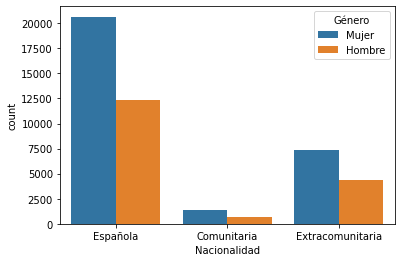

In [90]:
sns.countplot(x = "Nacionalidad", hue="Género", data = dataset);

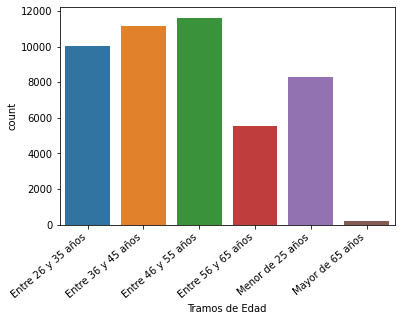

In [91]:
ax = sns.countplot(x = "Tramos de Edad", data = dataset);

ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right");

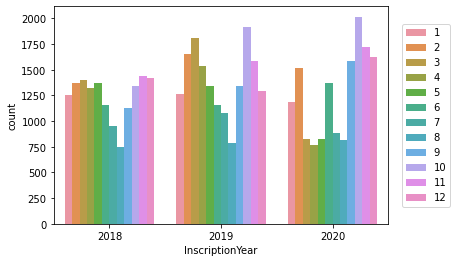

In [92]:
g = sns.countplot(x = "InscriptionYear", hue="InscriptionMonth", data = dataset)
g.legend(bbox_to_anchor= (1.2, 0.5), loc=5);

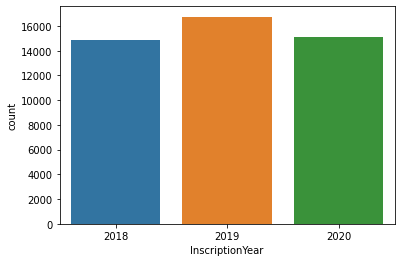

In [95]:
sns.countplot(x = "InscriptionYear", data = dataset)